In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
#Read the train data from train_MpHjUjU.csv

train_df= pd.read_csv('C:\\Users\\subhr\\Desktop\\job_a_thon\\train_MpHjUjU.csv')

In [3]:
#Viewing the first ten rows 
train_df.head(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,350000,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1


In [4]:
#Viewing the number of dimensions and observations

train_df.shape

(19104, 13)

In [5]:
#Viewing the column names, non-null counts and data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [6]:
#Retrieved number of unique Employees from Emp_ID column

train_df.Emp_ID.nunique()

2381

In [7]:
#Aggregated the Total business value generated by each employee in each month and saved the data in a new dataframe

train_value_df = train_df.groupby('Emp_ID')['Total Business Value'].sum()

In [8]:
#Reset the index to default index

train_value_df = train_value_df.reset_index()

In [9]:
train_value_df

,Emp_ID,Total Business Value
0,1,1715580
1,2,0
2,4,350000
3,5,120360
4,6,1265000
...,...,...
2376,2784,21748820
2377,2785,0
2378,2786,2815090
2379,2787,977830


In [10]:
#Created a new dataframe by dropping the features that are no longer required for the purpose of cleaning the redundant rows

train_refined_df = train_df.drop(['MMM-YY','Joining Designation','Total Business Value'],axis=1)

In [11]:
train_refined_df.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Designation,Quarterly Rating
0,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,2
1,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,2
2,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,2
3,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,1
4,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,1


In [12]:
#Dropped the duplicate rows and keeping only the last versions of duplicates to avoid data loss

train_refined_df=train_refined_df.drop_duplicates(subset='Emp_ID',keep='last')

In [13]:
#Merge train_refined_df and train_value_df dataframes to create a new dataframe with total business value of each employee and 
#devoid of redundancy 

train_new_df = pd.merge(left= train_refined_df,right= train_value_df,on='Emp_ID')

In [14]:
train_new_df

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Designation,Quarterly Rating,Total Business Value
0,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,2,1715580
1,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,1,0
2,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,1,350000
3,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,120360
4,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,2,1265000
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,Male,C24,College,82815,2012-10-15,NaN,3,4,21748820
2377,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0
2378,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,1,2815090
2379,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,977830


In [15]:
#function to determine the attrition 

def attrition_calc(cols):
    LWD = cols
    if LWD is np.NaN:
        return 0
    else:
        return 1

In [16]:
#Applying the attrition_cal function on each element of train_new_df['LastWorkingDate'] series and creating a new Attrition feature

train_new_df['Attrition'] = train_new_df['LastWorkingDate'].apply(attrition_calc)

In [17]:
train_new_df

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Designation,Quarterly Rating,Total Business Value,Attrition
0,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,2,1715580,1
1,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,1,0,0
2,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,1,350000,1
3,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,120360,1
4,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,2,1265000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,Male,C24,College,82815,2012-10-15,NaN,3,4,21748820,0
2377,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1
2378,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,1,2815090,1
2379,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,977830,1


In [18]:
#one hot encoding the necessary Nominal columns

train_encode_df= pd.get_dummies(train_new_df[['Gender','Education_Level']])

In [19]:
train_encode_df

,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,0,1,0,0,1
1,0,1,0,0,1
2,0,1,0,0,1
3,0,1,0,1,0
4,1,0,1,0,0
...,...,...,...,...,...
2376,0,1,0,1,0
2377,1,0,0,1,0
2378,0,1,0,1,0
2379,1,0,0,0,1


In [20]:
#Creating a new dataframe by dropping unnecessary features 

train_pre_final_df = train_new_df.drop(['City','Gender','Education_Level','Dateofjoining','LastWorkingDate'],axis=1)

In [21]:
train_pre_final_df

,Emp_ID,Age,Salary,Designation,Quarterly Rating,Total Business Value,Attrition
0,1,28,57387,1,2,1715580,1
1,2,31,67016,2,1,0,0
2,4,43,65603,2,1,350000,1
3,5,29,46368,1,1,120360,1
4,6,31,78728,3,2,1265000,0
...,...,...,...,...,...,...,...
2376,2784,34,82815,3,4,21748820,0
2377,2785,34,12105,1,1,0,1
2378,2786,45,35370,2,1,2815090,1
2379,2787,28,69498,1,1,977830,1


In [22]:
#Concatenating two dataframes into a final training dataframe

train_final_df = pd.concat([train_encode_df,train_pre_final_df],axis=1)

In [23]:
train_final_df

,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Emp_ID,Age,Salary,Designation,Quarterly Rating,Total Business Value,Attrition
0,0,1,0,0,1,1,28,57387,1,2,1715580,1
1,0,1,0,0,1,2,31,67016,2,1,0,0
2,0,1,0,0,1,4,43,65603,2,1,350000,1
3,0,1,0,1,0,5,29,46368,1,1,120360,1
4,1,0,1,0,0,6,31,78728,3,2,1265000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,1,0,1,0,2784,34,82815,3,4,21748820,0
2377,1,0,0,1,0,2785,34,12105,1,1,0,1
2378,0,1,0,1,0,2786,45,35370,2,1,2815090,1
2379,1,0,0,0,1,2787,28,69498,1,1,977830,1


<AxesSubplot:>

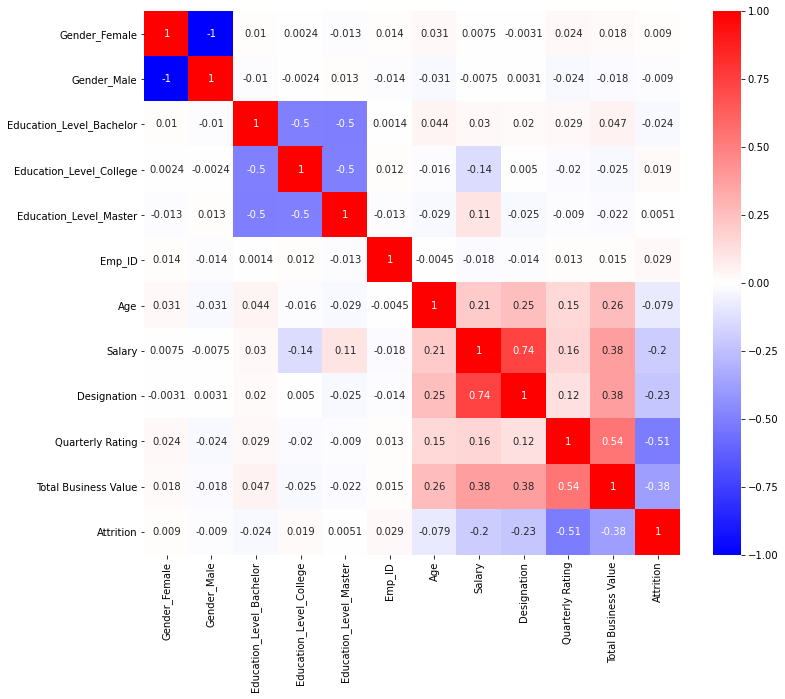

In [24]:
'''plotting heatmap of the correlation coefficient between each and features features. Most of the features as shown by the heatmap
have almost no correlation with Attrition feature except Salary,Designation,Quaterly Rating & Total Business value features which
are negatively correlated'''

plt.figure(figsize=(12,10))
sns.heatmap(train_final_df.corr(), cmap='bwr', annot=True)  

In [25]:
#Creating Independent and Target Variable for machine learning

X_train= train_final_df[['Salary','Designation','Quarterly Rating','Total Business Value']]
Y_train= train_final_df['Attrition']

In [26]:
#Initializing Logistic Regression model

lr = LogisticRegression()

In [27]:
#fitting the data into lr model

lr.fit(X_train,Y_train)

LogisticRegression()

In [28]:
#printing out the coefficients or slopes of the multiple linear equation

print(lr.coef_)

[[ 1.71952810e-05  5.97524427e-10  2.32995767e-10 -1.12238102e-07]]


In [29]:
#printing out the intercept of the multiple linear equation

print(lr.intercept_)

[3.41347453e-10]


In [30]:
#Reading the Employee ID provided for testing

test_df = pd.read_csv('C:\\Users\\subhr\\Desktop\\job_a_thon\\test_hXY9mYw.csv')

In [31]:
test_df.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [32]:
#Preparing the test dataframe

test_final_df = pd.merge(left=test_df,right=train_final_df,on='Emp_ID')

In [33]:
test_final_df.head()

,Emp_ID,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Age,Salary,Designation,Quarterly Rating,Total Business Value,Attrition
0,394,1,0,0,0,1,34,97722,4,3,27458220,0
1,173,0,1,0,1,0,39,56174,3,3,19866290,0
2,1090,0,1,0,1,0,39,96750,4,2,50382490,0
3,840,1,0,0,1,0,40,88813,4,2,17134040,0
4,308,0,1,0,0,1,32,188418,5,2,58024490,0


In [34]:
#Preparing the Independent variables for testing

X_test = test_final_df[['Salary','Designation','Quarterly Rating','Total Business Value']]

In [35]:
#Testing the logistic regression model on the prepared Independent variable

Y_Pred = lr.predict(X_test)

In [36]:
#Displaying the prediction

Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,

In [37]:
#Creating a dataframe of prediction

Y_Pred_result_df = pd.DataFrame(data={'Emp_ID':test_df['Emp_ID'],'Target':Y_Pred})

In [38]:
#Writing the prediction ta a CSV file

Y_Pred_result_df.to_csv('C:\\Users\\subhr\\Desktop\\job_a_thon\\prediction_result.csv')